In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
s, r = 1283, 103
path = f'../data/result/{s}_{r}/'
X = np.load(path+'resultX.npy')
print(X.shape)
X = X.reshape(X.shape[0], s+r, 2)
print(X.shape)

species = np.load(path+'species.npy', allow_pickle=True)
region = np.load(path+'region.npy', allow_pickle=True)


(17, 2772)
(17, 1386, 2)


In [48]:
t = 0
Xspecies = X[:,:s]
Xregion = X[:, s:]
print(Xspecies.shape)
print(Xregion.shape)

# Get the species out 

(17, 1283, 2)
(17, 103, 2)


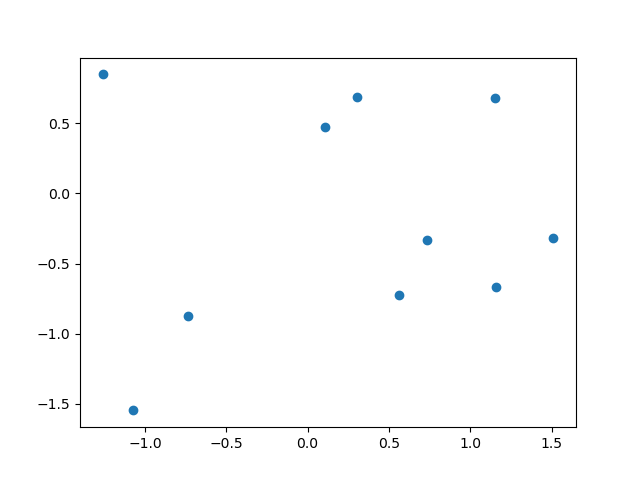

In [49]:
X0 = X[16]
curr = X0[0:10]

%matplotlib widget
plt.scatter(curr[:,0], curr[:, 1])
plt.show('test.png')

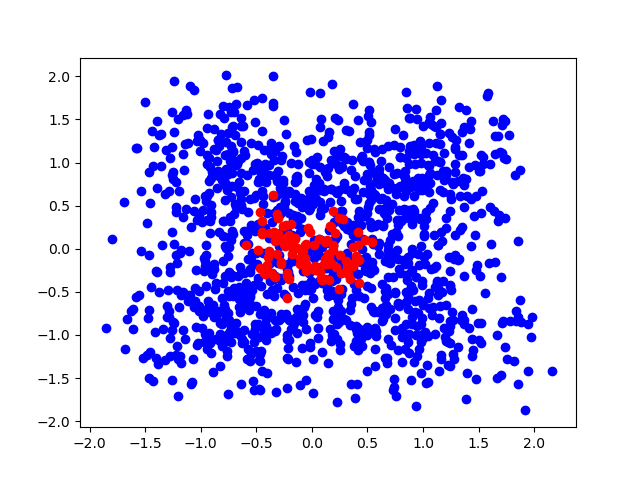

In [50]:
# Make a movie out of this
import matplotlib.animation as animation
%matplotlib widget

fig = plt.figure()


imgs = []
for t in range(X.shape[0]):
    Xs_curr = Xspecies[t]
    Xr_curr = Xregion[t]
    # fig = plt.figure() # if want to save plots
    
    im1 = plt.scatter(Xs_curr[:,0], Xs_curr[:, 1], c='blue')
    im2 = plt.scatter(Xr_curr[:,0], Xr_curr[:, 1], c='red')
    # if t in [0, 5, 10, 15]:
    #     print('save image')
    #     plt.savefig(f'../../latex/figures/latentspace_tf{t}')
    imgs.append([im1, im2])

ani = animation.ArtistAnimation(fig, imgs, interval=500, blit=True,
                                repeat_delay=1000)
ani.save(path+'dynamic_evolution.mp4')

# plt.show()

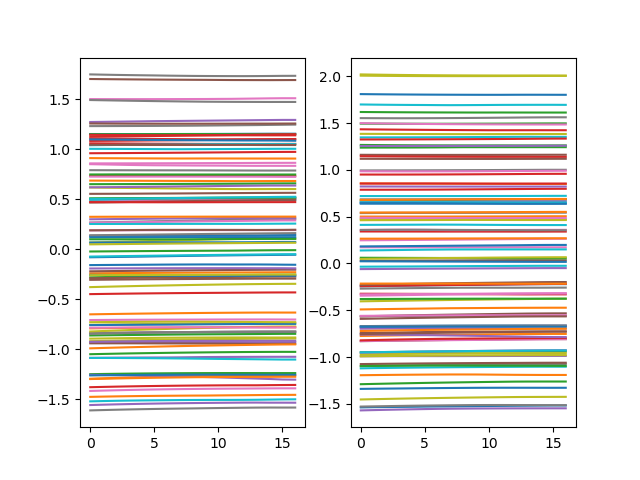

In [51]:
# Plot trajectories X, Y
# Xspecies[:,0,:]
fig = plt.figure()
plt.subplot(121)  
_ = plt.plot(Xspecies[:, 1:100, 0])
plt.subplot(122)  # 1 row, 2 columns, Plot 2
_ = plt.plot(Xspecies[:, 1:100, 1])

plt.savefig(f'../../latex/figures/trajectories')

In [52]:
# Reshape into trajectories
trajS = Xspecies.transpose(1, 0, 2).reshape(Xspecies.shape[1], Xspecies.shape[0]*Xspecies.shape[2])
trajR = Xregion.transpose(1, 0, 2).reshape(Xregion.shape[1], Xregion.shape[0]*Xregion.shape[2])


In [53]:
from sklearn.cluster import OPTICS, DBSCAN, cluster_optics_dbscan

# clust = OPTICS(min_samples=5)
clust = DBSCAN(eps= 0.3, min_samples=5)
clust.fit(trajS)

DBSCAN(eps=0.3)

In [54]:
clust.labels_

array([ 0, -1, -1, ..., -1, -1, -1])

In [55]:
# Analyse size of cluster
unique, counts = np.unique(clust.labels_, return_counts=True)
clust_sz = dict(zip(unique, counts))

fig = plt.figure()
mylist = [key for key, val in clust_sz.items() for _ in range(val)]
plt.hist(mylist, bins=20)
plt.savefig(f'../../latex/figures/cluster_distribution')

TypeError: 'dict' object is not callable

In [ ]:
from collections import Counter
c = Counter(clust_sz)
most_common = c.most_common(5)
print(most_common)


[(-1, 689), (26, 17), (3, 16), (6, 15), (50, 15)]


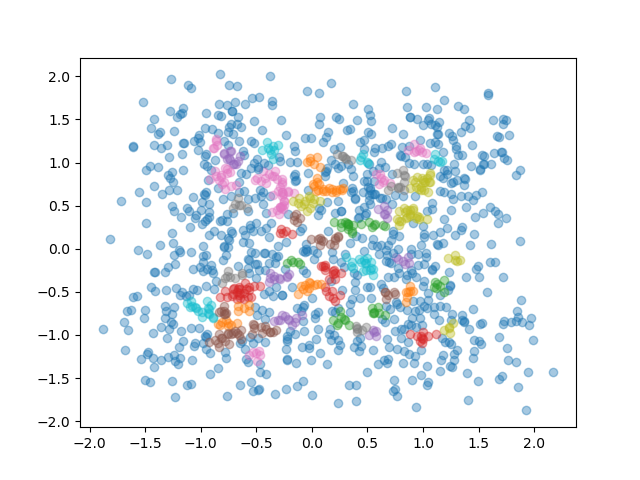

In [56]:
# Plot trajectories clusters animation
import matplotlib
fig = plt.figure()

colors = ["g.", "r.", "b.", "y.", "c.", 'w.']
cmap = matplotlib.cm.get_cmap('Spectral')

for klass in range(-1, 1000):
    Xk = Xspecies[:, clust.labels_ == klass]

    plt.scatter(Xk[0, :, 0], Xk[0, :, 1], alpha=0.4)

plt.savefig(f'../../latex/figures/cluster_2d')
# plt.plot(X[clust.labels_ == -1, 0], X[clust.labels_ == -1, 1], "k+", alpha=0.1)
# plt.set_title("Automatic Clustering\nOPTICS")


In [57]:
from dataset import InvasiveSpecies
# And this is how you get the names

InvSpec = InvasiveSpecies( '../data/GlobalAlienSpeciesFirstRecordDatabase_v2.xlsx')
InvSpec.filter_data()

,TaxonName,Family,LifeForm,Region,FirstRecord
0,Acanthophora muscoides,Rhodomelaceae,Algae,Turkey,1986
2,Acanthophora nayadiformis,Rhodomelaceae,Algae,Greece,1861
3,Acanthophora nayadiformis,Rhodomelaceae,Algae,Turkey,1970
6,Acetabularia caliculus,Polyphysaceae,Algae,Israel,1943
7,Acetabularia caliculus,Polyphysaceae,Algae,Spain,1957
...,...,...,...,...,...
61561,Plum pox virus,Potyviridae,Viruses,Tunisia,2002
61562,Plum pox virus,Potyviridae,Viruses,Turkey,1968
61563,Plum pox virus,Potyviridae,Viruses,Ukraine,1967
61564,Plum pox virus,Potyviridae,Viruses,United States,1999


In [58]:
df = InvSpec.df 
family = df[df['TaxonName'] == 'Plum pox virus']['Family'].unique()[0]
print(family)

print(df['LifeForm'].unique()) 

Potyviridae
['Algae' 'Amphibians' 'Arthropods p.p. (Myriapods, Diplopods etc.)'
 'Bacteria and protozoans' 'Birds' 'Bryophytes' 'Bryozoa' 'Crustaceans'
 'Fishes' 'Fungi' 'Insects' 'Invertebrates (excl. Arthropods, Molluscs)'
 'Mammals' 'Molluscs' 'Reptiles' 'Spiders' 'Vascular plants' 'Viruses']


In [60]:
# Analyse clusters
from dataset import InvasiveSpecies
# And this is how you get the names

InvSpec = InvasiveSpecies( '../data/GlobalAlienSpeciesFirstRecordDatabase_v2.xlsx')

for klass in range(0, 6):
    dict = {}

    clusterS = species[clust.labels_ == klass]
    print(f'Taxonomic families for klass {klass} with size {len(clusterS)}')
    for s in clusterS:
        # get taxonomic family of each species
        family = df[df['TaxonName'] == s]['LifeForm'].unique()[0]
        if family in dict.keys():
           dict[family] += 1 
        else:
            dict[family] = 1
    print(f'For cluster {klass}')
    
    for key, el in dict.items():
        print(key, el/len(clusterS))

Taxonomic families for klass 0
8
For cluster 0
Algae 0.125
Fishes 0.125
Insects 0.125
Vascular plants 0.625
Taxonomic families for klass 1
7
For cluster 1
Algae 0.14285714285714285
Fishes 0.14285714285714285
Molluscs 0.14285714285714285
Reptiles 0.14285714285714285
Vascular plants 0.42857142857142855
Taxonomic families for klass 2
5
For cluster 2
Algae 0.2
Fishes 0.2
Vascular plants 0.6
Taxonomic families for klass 3
11
For cluster 3
Algae 0.18181818181818182
Fishes 0.18181818181818182
Mammals 0.09090909090909091
Vascular plants 0.5454545454545454
Taxonomic families for klass 4
18
For cluster 4
Algae 0.1111111111111111
Birds 0.1111111111111111
Crustaceans 0.05555555555555555
Fishes 0.05555555555555555
Insects 0.1111111111111111
Invertebrates (excl. Arthropods, Molluscs) 0.05555555555555555
Molluscs 0.05555555555555555
Vascular plants 0.4444444444444444
Taxonomic families for klass 5
35
For cluster 5
Amphibians 0.02857142857142857
Birds 0.08571428571428572
Crustaceans 0.0285714285714285